**Data Pre-processing:**

In [88]:
import numpy as np #    linear algebra
import pandas as pd #    data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #    data visualization
import matplotlib.pyplot as plt #    plotting library
import warnings #    to ignore warnings
import os #    to interact with the operating system
warnings.filterwarnings('ignore')

In [89]:
insurance_df = pd.read_csv("D:\\AI & Machine Learning\\Tasks\\insurance.csv")
insurance_df.head(10) #    to display the first 10 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**(1) Data Understanding:**

In [90]:
insurance_df.info() #    to get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
insurance_df.describe() #    to get a statistical summary of the DataFrame

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
# Drop the 'sex' column if it exists
if 'sex' in insurance_df.columns:
	insurance_df.drop(['sex'], axis=1, inplace=True) #    to drop the 'sex' column

# Drop the 'region' column if it exists
if 'region' in insurance_df.columns:
	insurance_df.drop(['region'], axis=1, inplace=True) #    to drop the 'region' column

insurance_df.head(10) #    to display the first 10 rows of the dataset after dropping the columns


,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
5,31,25.740,0,no,3756.62160
6,46,33.440,1,no,8240.58960
7,37,27.740,3,no,7281.50560
8,37,29.830,2,no,6406.41070
9,60,25.840,0,no,28923.13692


**(2) Check for Datatypes:**

In [93]:
D_types = insurance_df.dtypes #    to get the data types of each column
num_unique = insurance_df.nunique() #    to get the number of unique values in each column
#To display the data types and number of unique values in a single DataFrame
pd.DataFrame({'Data Type': D_types, 'Num Unique': num_unique}).T #    to transpose the DataFrame for better readability

,age,bmi,children,smoker,charges
Data Type,int64,float64,int64,object,float64
Num Unique,47,548,6,2,1337


In [94]:
#No Need To Change the Data Types of the related features to the target variable

**(3) Handle Null Values:**

In [95]:
#check for null values in the dataset
null = insurance_df.isnull().sum() #    to check for null values in the dataset
ratio = null / insurance_df.shape[0] #    to calculate the ratio of null values to the total number of rows
pd.DataFrame({'Null Sum': null, 'Ratio': ratio}).T #    to create a DataFrame with null values and their ratios

,age,bmi,children,smoker,charges
Null Sum,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0


In [96]:
#There are no null values in the dataset, so we can proceed with the analysis.

**(4) Handle Outliers:**

['age', 'bmi', 'children']


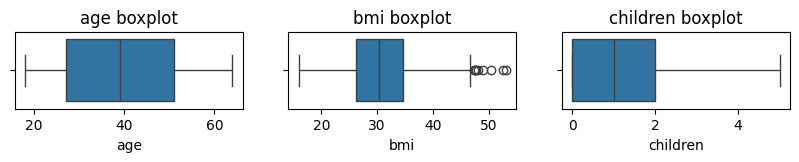

In [97]:
'''(1) To check for outliers in the numerical columns except the target, we can use a box plot.'''

target_feature = "charges"
num_columns = [col for col in insurance_df.select_dtypes(include=[np.number]).columns.tolist() if col != target_feature]
plt.figure(figsize=(10, 1)) #    to set the figure size
print (num_columns) #    to print the numerical columns

for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i + 1) #    to create subplots
    sns.boxplot(insurance_df[col], orient="h") #    to create a box plot for each numerical column
    plt.title(f"{col} boxplot") #    to set the title of each subplot

In [98]:
'''(2) To remove outliers in the columns'''
for col in num_columns:
    Q1 = insurance_df[col].quantile(0.25) #to calculate the first quartile of the column
    Q3 = insurance_df[col].quantile(0.75) #to calculate the third quartile of the column
    IQR = Q3 - Q1  #to calculate the inter quartile range of the column
    lower_fence = Q1 - 1.5*IQR  #    to calculate the lower bound of the column
    upper_fence = Q3 + 1.5*IQR  #    to calculate the upper bound of the column
    
    lower_outliers = insurance_df[insurance_df[col] < lower_fence][col].values   #    to calculate the lower outliers of the column
    upper_outliers = insurance_df[insurance_df[col] > upper_fence][col].values   #    to calculate the upper outliers of the column
    
    insurance_df[col].replace(lower_outliers, lower_fence, inplace = True)       #    to replace the lower outliers with the lower bound of the column
    insurance_df[col].replace(upper_outliers, upper_fence, inplace = True)       #    to replace the upper outliers with the upper bound of the column


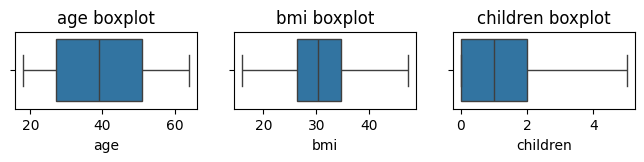

In [99]:
'''(3)To make sure that outliers in the column are removed:'''
plt.figure(figsize=(8, 1)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    sns.boxplot(insurance_df[col], orient="h") #    to create a boxplot of the numerical columns in the dataset with orientation "h"
    plt.title(f"{col} boxplot") #    to set the title of the boxplot to the name of the column

**(5) Visualization:**

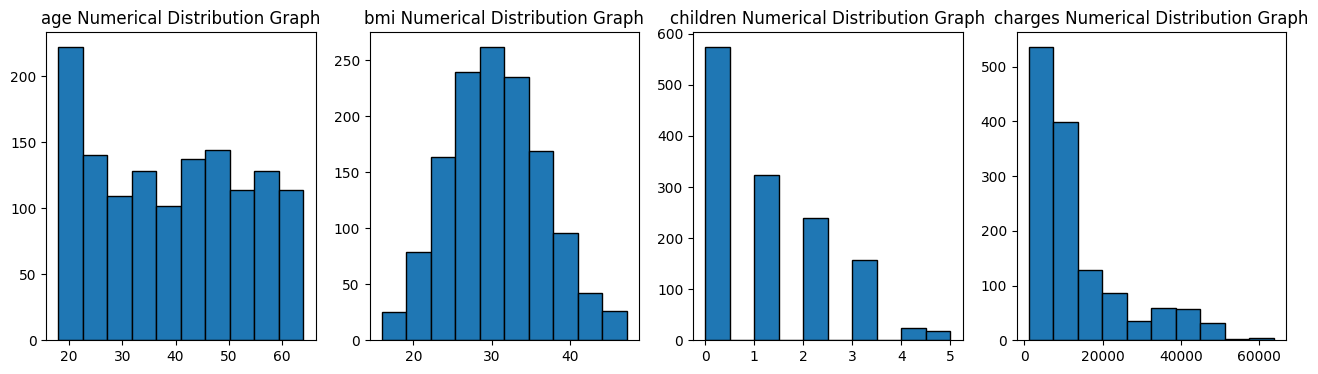

In [100]:
'''1- To visualize the data in the dataset using a histogram (Numerical Data Distribution):'''

num_columns = insurance_df.select_dtypes("number").columns #    to select the numerical columns in the dataset
plt.figure(figsize=(16, 4)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    plt.hist(insurance_df[col], edgecolor='black') #    to create a histogram of the numerical columns in the dataset with kde=True
    plt.title(f"{col} Numerical Distribution Graph") #    to set the title of the histogram to the name of the column

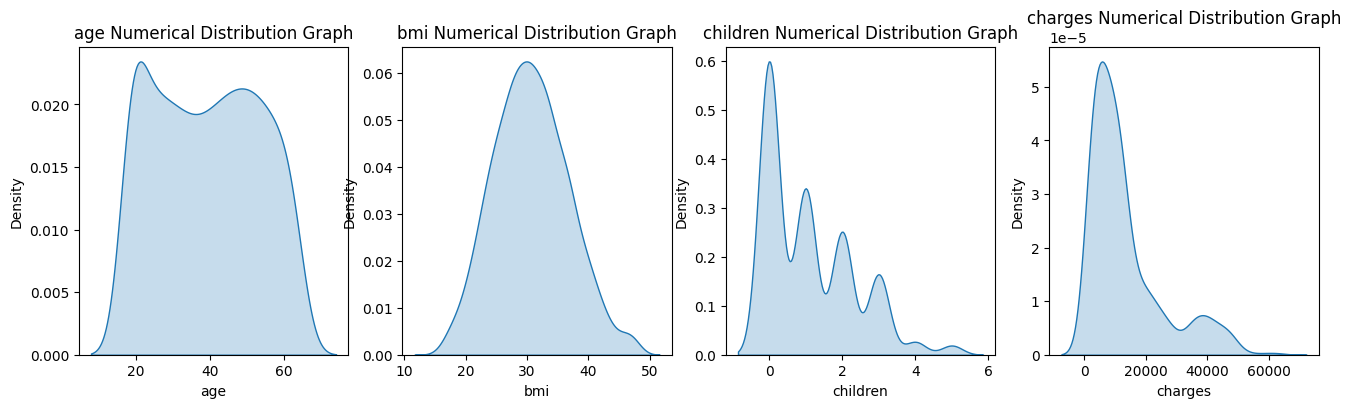

In [101]:
'''2- To visualize the data in the dataset using a KDE plot (Numerical Data Distribution):'''
num_columns = insurance_df.select_dtypes("number").columns #    to select the numerical columns in the dataset
plt.figure(figsize=(16, 4)) #    to create a figure with a size of 8X1 inches
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    sns.kdeplot(insurance_df[col], fill=True) #    to create a KDE plot of the numerical columns in the dataset with fill=True
    plt.title(f"{col} Numerical Distribution Graph") #    to set the title of the KDE plot to the name of the column

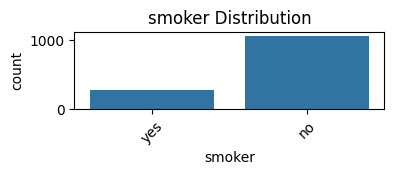

In [ ]:
'''3- To visualize the data in the dataset using a Count plot (Categorical Data Distribution):'''
cat_cols = insurance_df.select_dtypes(include=["object"]).columns
plt.figure(figsize=(4, 1))
for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i + 1)
    sns.countplot(x=col, data=insurance_df)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

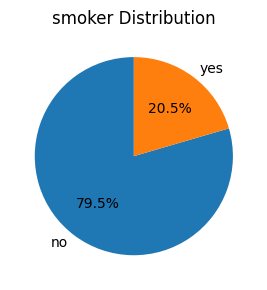

In [102]:
'''4- To visualize the data in the dataset using a Pie plot (Categorical Data Distribution):'''
cat_cols = insurance_df.select_dtypes(include=["object"]).columns
plt.figure(figsize=(3 * len(cat_cols), 3))

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i + 1)
    insurance_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} Distribution")
    plt.ylabel("")  # Hide y-axis label for cleaner plot

plt.tight_layout()
plt.show()

In [103]:
#Relationship Graphs:


**(6) Remove Duplicates:**

In [104]:
'''1- Check for duplicates in the dataset:'''
duplicates = insurance_df.duplicated().sum() #    to check for duplicates in the dataset
print (duplicates) #    to display the number of duplicates in the dataset

1


In [105]:
'''Make sure that we Remove Duplicates:'''
insurance_df.drop_duplicates(inplace=True) #    to remove the duplicates in the dataset
insurance_df.duplicated().sum() #    to check for duplicates in the dataset after removing them

np.int64(0)

**(7) Data Splitting:**

In [106]:
#1- To split the data into target and features sets:
Y = insurance_df['charges'] #    to set the target variable to the Survived column
X = insurance_df.drop(['charges'], axis=1) #    to set the features variable to the dataset without the Survived column

In [107]:
X

,age,bmi,children,smoker
0,19,27.900,0,yes
1,18,33.770,1,no
2,28,33.000,3,no
3,33,22.705,0,no
4,32,28.880,0,no
...,...,...,...,...
1333,50,30.970,3,no
1334,18,31.920,0,no
1335,18,36.850,0,no
1336,21,25.800,0,no


In [108]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

**(7) Data Normalization:**

In [109]:
'''1- To normalize the data using MinMaxScaler:'''
from sklearn.preprocessing import MinMaxScaler #    to import the MinMaxScaler class from the sklearn.preprocessing module
num_columns = X.select_dtypes("number").columns #    to select the numerical columns in the dataset
scaler = MinMaxScaler() #    to create an instance of the MinMaxScaler class
scaler.fit(X[num_columns]) #    to fit the scaler to the numerical columns in the dataset
X[num_columns] = scaler.transform(X[num_columns]) #    to transform the numerical columns in the dataset using the scaler

**(8) Encoding:**

In [110]:
'''1- To check for Number of Unique Values in the dataset:'''
str_columns = ["smoker"] #    to set the string columns to numerical columns
pd.DataFrame(X[str_columns].nunique()).T #    to create a DataFrame with the number of unique values in the string columns

,smoker
0,2


In [111]:
#2- By using OneHotEncoder:
from category_encoders import OneHotEncoder #    to import the OneHotEncoder class from the category_encoders module
encoder = OneHotEncoder(cols=str_columns) #    to create an instance of the OneHotEncoder class with the string columns
z = encoder.fit_transform(X) #    to fit and transform the dataset using the encoder
z

,age,bmi,children,smoker_1,smoker_2
0,0.021739,0.381104,0.0,1,0
1,0.000000,0.568465,0.2,0,1
2,0.217391,0.543888,0.6,0,1
3,0.326087,0.215289,0.0,0,1
4,0.304348,0.412384,0.0,0,1
...,...,...,...,...,...
1333,0.695652,0.479094,0.6,0,1
1334,0.000000,0.509416,0.0,0,1
1335,0.000000,0.666773,0.0,0,1
1336,0.065217,0.314076,0.0,0,1
